# Thrust vectored AUV

## Extremeley similar to thrust vector rocket landing (a la moda di SpaceX)
![](rocket.png)
![](equations.png)

In [1]:
from sympy import *
init_printing()

In [2]:
# state
x, y, vx, vy, theta, omega = symbols('x y vx vy theta omega', real=True)
p = Matrix([x, y])
v = Matrix([vx, vy])
s = Matrix([p, v, [theta], [omega]])
s.T

[x  y  vx  vy  θ  ω]

In [3]:
# costate variables
lx, ly, lvx, lvy, ltheta, lomega = symbols('lambda_x lambda_y lambda_v_x lambda_v_y lambda_theta lambda_omega', real=True)
lp = Matrix([lx, ly])
lv = Matrix([lvx, lvy])
l = Matrix([lp, lv, [ltheta], [lomega]])
l.T

[λₓ  λ_y  λᵥ ₓ  λ_v_y  λ_θ  λ_ω]

In [4]:
# params: gravity, max thrust, mass, half length of auv
g, T, m, length, alpha, rho, cd, A = symbols('g T m L alpha rho C_d A', real=True, positive=True)
params = Matrix([g, T, m, length, alpha, rho, cd, A])
params.T

[g  T  m  L  α  ρ  C_d  A]

In [5]:
# actions
u = symbols('u', real=True, positive=True)
phi = symbols('phi', real=True)
actions = Matrix([u, phi])
actions.T

[u  φ]

In [6]:
# thrust vector tilt wrt global frame
t = Matrix([cos(theta + phi), sin(theta + phi)])

# rocket orientation wrt horizontal
itheta = Matrix([cos(theta), sin(theta)])

# perpendicular direction to orientation
itau = Matrix([sin(theta), -cos(theta)])

In [7]:
# dynamics
dr = v
dv = T*u*t + Matrix([0, -g]) + Rational(1, 2)*rho*sqrt(sum([vec**2 for vec in v]))*v*cd*A
dtheta = omega
domega = 12*T*u/m/length**2 * t.dot(itau)
ds = Matrix([dr, dv, [dtheta], [domega]])
ds

⎡                      vx                      ⎤
⎢                                              ⎥
⎢                      vy                      ⎥
⎢                                              ⎥
⎢                ___________                   ⎥
⎢               ╱   2     2                    ⎥
⎢  A⋅C_d⋅ρ⋅vx⋅╲╱  vx  + vy                     ⎥
⎢  ───────────────────────── + T⋅u⋅cos(φ + θ)  ⎥
⎢              2                               ⎥
⎢                                              ⎥
⎢              ___________                     ⎥
⎢             ╱   2     2                      ⎥
⎢A⋅C_d⋅ρ⋅vy⋅╲╱  vx  + vy                       ⎥
⎢───────────────────────── + T⋅u⋅sin(φ + θ) - g⎥
⎢            2                                 ⎥
⎢                                              ⎥
⎢                      ω                       ⎥
⎢                                              ⎥
⎢12⋅T⋅u⋅(sin(θ)⋅cos(φ + θ) - sin(φ + θ)⋅cos(θ))⎥
⎢──────────────────────────────────────────────⎥
⎢                   

In [8]:
# dynamic Lagrangian to minimise thrust usage
L = (1- alpha)*u**2 + alpha*u
L

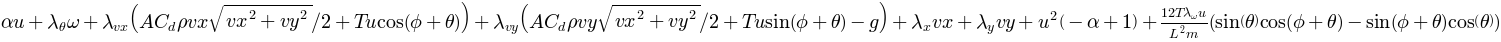

In [9]:
# Hamiltonian
H = l.dot(ds) + L
H

In [10]:
# optimal thrust direction
laux = (lv + lomega*12/length**2*itau)
lauxnorm = sqrt(sum([laux[i]**2 for i in range(len(laux))]))
lauxdir = laux/lauxnorm
tstar = -lauxdir
tstar = simplify(tstar)
tstar

⎡                  ⎛ 2                     ⎞                   ⎤
⎢                 -⎝L ⋅λᵥ ₓ + 12⋅λ_ω⋅sin(θ)⎠                   ⎥
⎢──────────────────────────────────────────────────────────────⎥
⎢    __________________________________________________________⎥
⎢   ╱                          2                             2 ⎥
⎢  ╱  ⎛ 2                     ⎞    ⎛ 2                      ⎞  ⎥
⎢╲╱   ⎝L ⋅λᵥ ₓ + 12⋅λ_ω⋅sin(θ)⎠  + ⎝L ⋅λ_v_y - 12⋅λ_ω⋅cos(θ)⎠  ⎥
⎢                                                              ⎥
⎢                     2                                        ⎥
⎢                  - L ⋅λ_v_y + 12⋅λ_ω⋅cos(θ)                  ⎥
⎢──────────────────────────────────────────────────────────────⎥
⎢    __________________________________________________________⎥
⎢   ╱                          2                             2 ⎥
⎢  ╱  ⎛ 2                     ⎞    ⎛ 2                      ⎞  ⎥
⎣╲╱   ⎝L ⋅λᵥ ₓ + 12⋅λ_ω⋅sin(θ)⎠  + ⎝L ⋅λ_v_y - 12⋅λ_ω⋅cos(θ)⎠  ⎦

In [11]:
# new Hamiltonian with optimal thrust direction
drs = v
dvs = T*u*t + Matrix([0, -g]) + Rational(1, 2)*rho*sqrt(sum([vec**2 for vec in v]))*v*cd*A
dthetas = omega
domegas = 12*T*u/m/length**2 * t.dot(itau)
dss = Matrix([dr, dv, [dtheta], [domega]])
Hstar = l.dot(dss) + L

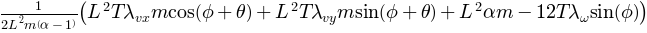

In [12]:
# optimal thrust magnitude (unbounded)
ustar = solve(Hstar.diff(u), u)[0]
ustar = simplify(ustar)
ustar

In [13]:
# costate equations of motion
dl = -Matrix([H.diff(var) for var in s])

# fullstate
dfs = Matrix([ds, dl])
dfs = simplify(dfs)
dfs

⎡                                    vx                                     ⎤
⎢                                                                           ⎥
⎢                                    vy                                     ⎥
⎢                                                                           ⎥
⎢                              ___________                                  ⎥
⎢                             ╱   2     2                                   ⎥
⎢                A⋅C_d⋅ρ⋅vx⋅╲╱  vx  + vy                                    ⎥
⎢                ───────────────────────── + T⋅u⋅cos(φ + θ)                 ⎥
⎢                            2                                              ⎥
⎢                                                                           ⎥
⎢                            ___________                                    ⎥
⎢                           ╱   2     2                                     ⎥
⎢              A⋅C_d⋅ρ⋅vy⋅╲╱  vx  + vy                          

# Code

In [21]:
print(cse((ustar, tstar)))

([(x0, L**2), (x1, 12*lambda_omega), (x2, T*m), (x3, phi + theta), (x4, lambda_v_x*x0 + x1*sin(theta)), (x5, lambda_v_y*x0), (x6, x1*cos(theta)), (x7, 1/sqrt(x4**2 + (x5 - x6)**2))], [(-T*x1*sin(phi) + alpha*m*x0 + lambda_v_x*x0*x2*cos(x3) + lambda_v_y*x0*x2*sin(x3))/(2*m*x0*(alpha - 1)), Matrix([
[       -x4*x7],
[x7*(-x5 + x6)]])])


In [22]:
tstar

⎡                  ⎛ 2                     ⎞                   ⎤
⎢                 -⎝L ⋅λᵥ ₓ + 12⋅λ_ω⋅sin(θ)⎠                   ⎥
⎢──────────────────────────────────────────────────────────────⎥
⎢    __________________________________________________________⎥
⎢   ╱                          2                             2 ⎥
⎢  ╱  ⎛ 2                     ⎞    ⎛ 2                      ⎞  ⎥
⎢╲╱   ⎝L ⋅λᵥ ₓ + 12⋅λ_ω⋅sin(θ)⎠  + ⎝L ⋅λ_v_y - 12⋅λ_ω⋅cos(θ)⎠  ⎥
⎢                                                              ⎥
⎢                     2                                        ⎥
⎢                  - L ⋅λ_v_y + 12⋅λ_ω⋅cos(θ)                  ⎥
⎢──────────────────────────────────────────────────────────────⎥
⎢    __________________________________________________________⎥
⎢   ╱                          2                             2 ⎥
⎢  ╱  ⎛ 2                     ⎞    ⎛ 2                      ⎞  ⎥
⎣╲╱   ⎝L ⋅λᵥ ₓ + 12⋅λ_ω⋅sin(θ)⎠  + ⎝L ⋅λ_v_y - 12⋅λ_ω⋅cos(θ)⎠  ⎦

In [ ]:
ds